## Imports

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

%matplotlib inline

## Global Variables

In [6]:
TEST_PROGRAM_PATH = "../custom_ds/main"

## Functions

In [40]:
def run_command(command):
    sproc = subprocess.Popen(command.split(' '), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, err = map(lambda byte: byte.decode('utf-8'), sproc.communicate())
    if err:
        raise Exception(err)
    return output.strip()

def compile_cpp(path, **kwargs):
    command = f"g++ {path}.cpp -o {path}.ignoreme"
    return run_command(command.strip())

def execute_cpp(path, **kwargs):
    command = f"./{path}.ignoreme {kwargs.get('file_path', '')} {kwargs.get('kmer_size', '')} {kwargs.get('hash_map_size', '')}"
    return run_command(command.strip())

## Dataframe Helper Functions

In [111]:
def create_dataframe(columns, data = []):
    return pd.DataFrame(columns = columns, data = data)

def plot_graphic(test_name, dataframe, x_axis, y_axis):
    plt.title(test_name)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.plot(a[x_axis], a[y_axis], '.')
    plt.show()

## Test Parameters
We want to define which tests do we want to do (for example, test the k-mer size influence on this algorithm).
Let's define a test suite structure, defining the parameter we want to test. The key should be the test name, and the value is a dict with the parameters we want to pass to our test function:
```python3
test_suite = {
  <test_name>: {
      'test_file_path': str,
      'kmer_size': int,
      'hash_map_size': int,
  }
}
```

In [117]:
def run_test_kmer(test):
    df = create_dataframe(columns)
    for kmer_size in test['kmer_size']:
        out = execute_cpp(
            TEST_PROGRAM_PATH, 
            file_path = test["file_path"], 
            kmer_size = kmer_size, 
            hash_map_size = test["hash_map_size"])
        df = df.append(create_dataframe(columns, [out.split(' ')]))
    return df

def run_test_hash_map_size(test):
    df = create_dataframe(columns)
    for hash_map_size in test['hash_map_size']:
        out = execute_cpp(
            TEST_PROGRAM_PATH, 
            file_path = test["file_path"], 
            kmer_size = test["kmer_size"], 
            hash_map_size = hash_map_size)
        df = df.append(create_dataframe(columns, [out.split(' ')]))
    return df

In [125]:
test_suite = {
    "test_kmer_size": {
        "file_path": "../datasets/dna.5MB",
        "kmer_size": [7, 8, 9, 10, 11, 12, 13, 14, 15],
        "hash_map_size": 504871,
    },
    "test_hash_map_size": {
        "file_path": "../datasets/dna.5MB",
        "kmer_size": 10,
        "hash_map_size": [50487],
    },
}

## Test

In [73]:
compile_cpp(TEST_PROGRAM_PATH)
columns = [
    "true_positives", 
    "true_negatives", 
    "false_positives", 
    "false_negatives", 
    "sensibility", 
    "specificity",
    "found_kmers",
]

In [119]:
test_kmer_size = run_test_kmer(test_suite["test_kmer_size"])

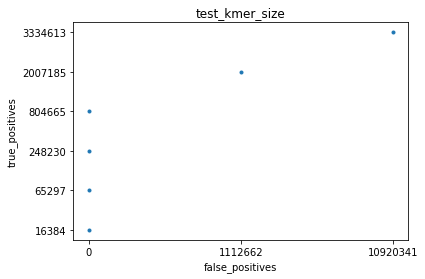

In [120]:
plot_graphic("test_kmer_size", test_kmer_size, "false_positives", "true_positives")

In [123]:
hash_map_size_test = run_test_hash_map_size(test_suite["test_hash_map_size"])

In [126]:
hash_map_size_test

,true_positives,true_negatives,false_positives,false_negatives,sensibility,specificity,found_kmers
0,804665,243911,0,0,1,1,804665
